#   Digit classification Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from tensorflow.keras.layers import Dense

In [2]:
  # to load the mnsit MKL
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
# print 10th image of X_train

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print((X_train).shape)

(60000, 28, 28)


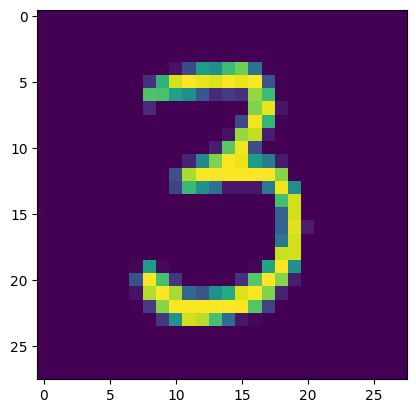

3


In [7]:
# displaying the imaage

plt.imshow(X_train[50])
plt.show()

# print the corresponding lebels
print(Y_train[50])

In [8]:
# Flatten the data: we need to convert the two-dimensional input data into a single-dimensional format for feeding into the model.

In [9]:
# image labels
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [10]:
# unique value in Y_train
print(np.unique(Y_train))

# unique value in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
# Scaling the values
X_train = X_train/255
X_test = X_test/255

# Building the Neural Network

In [12]:
from keras.api._v2.keras import activations
# Setting the layers of the neural network, Neurons =50, classes = 10
model = keras.Sequential([
                     keras.layers.Flatten(input_shape=(28,28)),
                     keras.layers.Dense(50, activation='relu'),
                     keras.layers.Dense(50, activation='relu'),
                     keras.layers.Dense(10, activation='sigmoid')
])

In [13]:
# compile the neural network
from keras.engine.training import optimizer

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
# Training the neural network
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2836 - accuracy: 0.9175
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1325 - accuracy: 0.9598
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0985 - accuracy: 0.9705
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0786 - accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0642 - accuracy: 0.9800
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0565 - accuracy: 0.9821
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0478 - accuracy: 0.9850
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0431 - accuracy: 0.9863
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0360 - accuracy: 0.9883
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.032

Training data accuracy = 98.9% ( after 10 epochs)

Accuracy on test data

In [15]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0977 - accuracy: 0.9753
0.9753000140190125


After running the test data, model accuracy is 97.2%

In [16]:
print(X_test.shape)

(10000, 28, 28)


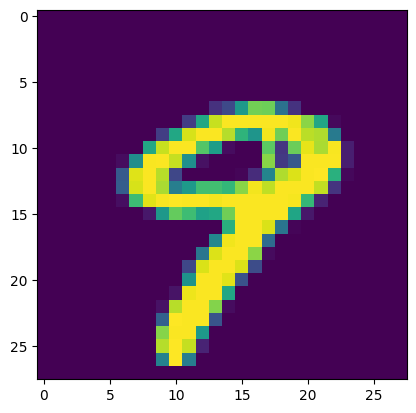

In [17]:
# To print the data point in the X_test
plt.imshow(X_test[9])
plt.show()

In [18]:
# To print the true labels
print(Y_test[9])

9


In [19]:
# Prediction of the model
Y_pred= model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [20]:
print(Y_pred.shape)

(10000, 10)


In [21]:
print(Y_pred[0])

[2.7259598e-03 8.6686603e-04 1.5541627e-01 9.9939770e-01 5.2419029e-08
 1.9175812e-04 3.3370345e-10 9.9999970e-01 2.6066682e-01 8.7564155e-02]


In [22]:
# converting the prediction probabilities to the class levels
labels_for_prob_prediction = np.argmax(Y_pred[0])
print(labels_for_prob_prediction)

7


In [23]:
# converting the prediction probabilities to class labels for all test data points
Y_pred_lebels = [np.argmax(i) for i in Y_pred]
print(Y_pred_lebels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 1, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test ----------> true labels

Y_pred_lebels ---> predicted labels

In [24]:
# create confusion matrix

conf_matrix = confusion_matrix(Y_test, Y_pred_lebels)

In [25]:
print(conf_matrix)

tf.Tensor(
[[ 969    1    0    1    0    3    4    0    1    1]
 [   0 1126    4    0    0    0    1    0    4    0]
 [   1    5 1008    5    0    0    1    6    6    0]
 [   0    1    6  989    0    5    0    6    2    1]
 [   0    2    2    0  962    2    5    3    1    5]
 [   2    0    1   13    2  863    4    2    2    3]
 [   2    4    3    2    3    4  939    0    1    0]
 [   1    4   10    3    0    0    0 1004    1    5]
 [   4    2    6    6    6    9    4    3  930    4]
 [   1    6    1    4   20    4    0    9    2  962]], shape=(10, 10), dtype=int32)


Text(120.72222222222221, 0.5, 'True Labels')

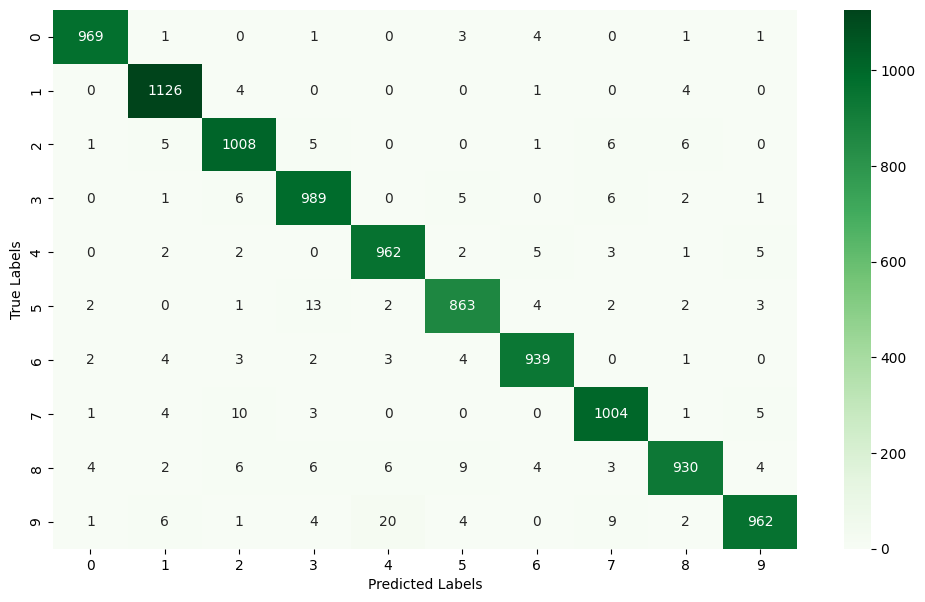

In [26]:
plt.figure(figsize = (12, 7))
sns.heatmap(conf_matrix, annot= True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# To build a predictive system

In [30]:
input_image_path = '/content/MNIST_5_0.png'

input_image = cv2.imread(input_image_path)

In [33]:
type(input_image)

numpy.ndarray

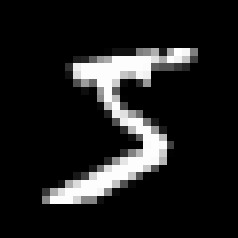

In [34]:
cv2_imshow(input_image)

In [35]:
input_image.shape

(238, 238, 3)

In [36]:
# convert rgb image to grayscale
from cv2.gapi import RGB2Gray

grayScale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [37]:
# Now, this image convert from RGB to grayscale()
grayScale.shape

(238, 238)

In [38]:
input_image_reize = cv2.resize(grayScale, (28, 28))

In [40]:
# check the new image color scheme
input_image_reize.shape

(28, 28)

In [39]:
# Print the image with grayscale and new dimension
cv2_imshow(input_image_reize)

In [41]:
# resize image in range (0-1)
input_resize_image = input_image_reize/255

In [42]:
type(input_resize_image)

numpy.ndarray

In [43]:
# resize of a particular given image of dim 28*28 of grayscale. for  RGB dim seze would be (28, 28, 3)
single_input_resize = np.reshape(input_resize_image, (1, 28, 28))

In [44]:
single_image_prediction = model.predict(single_input_resize)
print(single_image_prediction)

1/1 [==============================] - 0s 20ms/step
[[2.0652867e-06 6.4279509e-01 7.8276634e-02 9.9872732e-01 2.4946109e-08
  9.9997944e-01 5.7071344e-07 5.7647720e-02 8.0402993e-02 5.5794251e-01]]


In [45]:
# to calculate the max probability for labels for the given image
input_pred_label = np.argmax(single_image_prediction)
print(input_pred_label)


5
